In [2]:
include("ProyectoFinal.jl")

Energia_3 (generic function with 1 method)

## Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [161]:
MasaSol = 1.
#MasaTierra = 0.0003015
#MasaLuna = 0.00000037
MasaTierra = 0.000001
MasaLuna = 0.0000000001

Distancia_TierraSol = 1.
Distancia_TierraLuna = 0.002577181
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 1.
VelocidadTraslacional_TierraLuna = 1.
VelocidadLuna_inicial = VelocidadTraslacional_TierraSol + VelocidadTraslacional_TierraLuna

PosicionInicialSol = [0., 0., 0.]
PosicionInicialTierra = [Distancia_TierraSol, 0., 0.]
PosicionInicialLuna = [Distancia_LunaSol_inicial, 0., 0.]

3-element Array{Float64,1}:
 1.00258
 0.0    
 0.0    

In [162]:
function iniciar(masa, posiciones, velocidades)
    condiciones = [masa, posiciones[1], posiciones[2], posiciones[3], velocidades[1], velocidades[2], velocidades[3]]
    return condiciones
end

iniciar (generic function with 1 method)

In [163]:
#Condiciones Iniciales

#CondicionesSol    = [MasaSol,     0.,                  0.,   0., 0.,                                 0.2, 0. ]
CondicionesSol = iniciar(MasaSol, PosicionInicialSol, [0.,0.,0.,])
CondicionesTierra = iniciar(MasaTierra, PosicionInicialTierra, [0., VelocidadTraslacional_TierraSol, 0.])
CondicionesLuna   = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadLuna_inicial, 0.])

#Agrupamos Todo

CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]

3-element Array{Array{Float64,1},1}:
 [1.0,0.0,0.0,0.0,0.0,0.0,0.0]            
 [1.0e-6,1.0,0.0,0.0,0.0,1.0,0.0]         
 [1.0e-10,1.002577181,0.0,0.0,0.0,2.0,0.0]

In [164]:
t, Sol, Tierra, Luna = Integrador3(CondicionesIniciales, 1000.);

In [165]:
t

2012-element Array{Float64,1}:
    0.0        
    0.000882345
    0.00181985 
    0.00291882 
    0.00427503 
    0.00599272 
    0.00822616 
    0.0111841  
    0.0153824  
    0.0207276  
    0.0283221  
    0.0382225  
    0.0513533  
    ⋮          
  993.184      
  993.501      
  993.897      
  994.356      
  994.955      
  995.636      
  996.452      
  997.217      
  997.941      
  998.759      
  999.728      
 1000.97       

In [166]:
PosicionSol = Sol[1]
VelocidadSol = Sol[2]

PosicionTierra = Tierra[1]
VelocidadTierra = Tierra[2]

PosicionLuna = Luna[1]
VelocidadLuna = Luna[2];

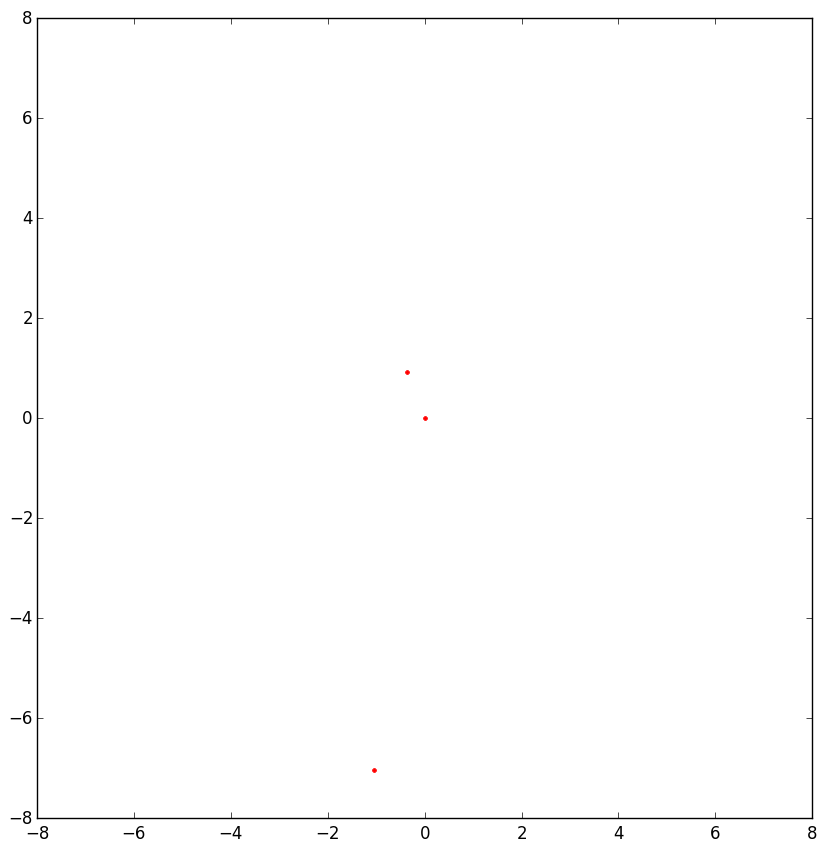

In [167]:
anima3C(Sol, Tierra, Luna, "Sistema2",1)

In [168]:
muestra_animacion("Sistema2")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAGTJJtZGF0AAACnwYF//+b3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0MiAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTQgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj01IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAPVGWIhAAU//73x0/Apuj5ZsudRT0hMIrY+kgovVjs0DJ1AAADAAADAAADAAADAVwNHk1PSmckNCQAAAMAALmAB2gA4AArXh/4R8/gCmsBLg591kqJ0t8KYUEQnZsNNtaAEsOyIwzhC60kIMm4Rb1skV1X0NAo/h2fXmTlmVKM0BNToxNvWUM05suzvYp1zsczQY2SGwh/MeMx95fRO0ZhpzUPGqLWAz7FIQm5GAudST+SD8Sc/38JTzR/sNfu7onBZvCL5pLf1COxAgVGs+70Mb4gYMwzEZiTnhkcJflpX98ODnySTcUAK4tqWIHWHI+J/Zx99bEndfCwiUU+xq1yPxyYT9b/4EK21Pklp0l58KjFw01N7IMAetr/QPZoa0QE8ddeaexmxvnylT/KtWdnF2ab+6tYLFCMT6xTAe+Wy1rYxwsEYWE1/HMu4BRn/1gA8/6z9GSRyAyKOPcUgUix5soG11DNEUYiTcvPZS93zbMlK60KgIy96QsP0uajbkm6TH6kNAjY+4xirLb9EuQvY49sYizj3aKzu4C6nEhMp9CR7NaIxC3pFqCsWHy9/joYkH8MXvvoJwq/fPTXl6RT0a8C1oPW1OFpXAADcX3KDgO3V3nL6xwNadWTaaTWaGXkaJerrZQkk7axfzJFEv8jZ8r7rBFlhgn9SBWgEI6aDWteTSm1ccMQzviCa7SnSf81BsM9yCbTNwfs3bcui+9KKS6KLH5Baafx+Q46mo4pNSisgx5CpujJc6mRlkSAAACf20MAI9XvACAVPABRJjwaw7u9OcYvYdDVQQEqlwOt8WtT2AcBKcljTvJ1RLwVKwCJeHfXLI95cLsJ9ViX4NC0C7l4Z/c9P+9GBvs6mjsd2B9qFq+CICD642rb4OKI5BWmoJJHP9OZGiRuxZN2GYdgAAsbFCuV157vZMPosUizXI1aUJqDNCyPhpG5KrB0lFI5DpNu5vFpli9oj9+b1NWsjbiP19t30RMiRO7kAAAjCx2qHLXrpvop34lqaSEBtJe01hEV855YsdgnAvgBDSumYAABgUqMAAi2ZOQAZOXAwAX9muWRZrukk5F0gFwvuwWr+IFbUYb0z7onfaMHKVBjyBKpVy7eDpwEcYIp3GtUdwumtw31P3Te7/FLV1YWO/5z49oF44PBX2m2SBj/Um0r/WK0llFkjCcliZ3NDFkVX1p2oQP1CYSh9tRT+ikjKS0hQetUNfiFiGNiOegAnn4DwAEB6MLKuBExUOhWF2nBSc6vHItVjYc2SxZir5sFOI0SVPjwlsVXQN9+I4gADqRgUnK9rrYAAAMAERAAAAMAAAMABKBUMKf6OUG4drRtOhjTMU1/7QO72BSxEQe3UFTzawDvWpMWk8ylgMLBIJHrvwobo9nBCy6NgBbN+LtafHq2HBMVBQJmi3jfNML6F0qQbxVbZdHGkOZg3kylLL0PEs8K3HYhRuE8cc+P2y6kM4K1RQVCmV/8MeuCnm5FO8EA/H8qC1Dwa84qJGH2x8YsscIO/7TvMpXYXvW8E2at4AAAAwAAAwAAAwAAJBPYsmlcEDOIRsSh82R65omNotAsNOsiLcu1xUZgLM1h8RbX4qFoxw18NO5E5Lp2nQAMfh7pNoeJd6LD/tAwFEa5G46xUQ89ln0RjuApugBdvRbqmV5tjG9tDBg1dyB8mFf7u62xo+/e0HOQaLcraUkF/oZd+mrsgeMPZMJT08fx4qbJTda0zt0g2MA9jm3z8sg8GjJpv5f79P6CNrmKKyl2d0MPbA4V9vZQIRp2As5QNwgjh4WkB4BqNqaOQ00zt2KCtohvG7JeZVdPcMg+COyKoJUXNVX9yyNxne6bCgyc3VDvnKFjmEWRr8V9N65BZO0XrE+CJpl5Ua1JBf9VMGZOQtwFhc8TWB9kToyM+D8c4/c2bz1XW3uB9zMjLbCPAygGSY7GrcxN4BD9jibjGmAQxK4Lx5wnrG1MHT7HN3VNkVIQycvVT23ErV+88xacwNdfawz/mDoch5kQR3ikx/no28tK+KHZMzPnmJpASWZ3SLpOTgiW4upxx9Oly/r1iROvqrchYsdXYI6dJ2fNfXMh+AEe2ZwAAAMAAAMAAAMAAAMALFc0Sw437QvYmP7AnEX1pLtodTRsSXf/SoDVyHwKWf0iLa3a64zEIQGyJWK0oKVpp3BQ473Emmn7wtZUtMBWRjI2KEpi/SG85c8PzGUGFt8sz05OT/4qzG/mclWji4dlruMTjzJjjv9T9PAoNf/vJPtmWD4Hyo37GfmXya3kSd6jGQqQOagFLY91H1MrB5///yFztLCUKKXD3p80P3jWH1jrHZ6HyPzhRoF6yRXtx6tjam4BMAJnljxzwN4/rkaVg/Jj4T+FjA1t1kPHVVBDTtzJx4jRRXp1f5TRgAAAAwAAAwAAAwAAAwAHV8z+tYJ2oIQ8T5xF9aS7aHU0a92YsYDqU4NnjyV5pnz2SkLw2/yviA9kh/Gph1zcYhw+QzXXBYNBoSdHYF9D+B4/99iCdKnU55rEgxEyjWJA0ZF1fwwo1fhcoWZ+tqPnHw5TmGgVjLWOcY0RyIWl0MhZMOrIKr4p9NPRlFcA++Y0TCSi8AnIKQD6YBktIswZmPd18U2ESYr7vxl31oyjq8td0xKYeZNXvwuYwsxG3Dd4zYJfaXvKK/YYovT+AQAAAwAAAwAAAwAAAwAAhLQsQmbjTCfE8T3iXsLUnDrkmHiL8BvbshvtMspvcpA4d77LX4QIKb2nDxqehNHd8YV5ruf6BZfTxzfWyJ0xR2xBxN2ItbfJf8GUWnk8jzqPM0ae1+JencQEf60hEy6DarEh5fLqjmpAAffaeV/nr6lNU5jpGOHRQ/6hwpH57rl10Vl60QsEbGwim3UeBEmjYC6tkgK/dgTLA1hpdZ7KoPZ0zFNAIqp5pMMbNSWeKpBXnUNcamcA4vpvbdPNtxWc4YkasmUnBWWOtCYaUCWQpJUYpTdUODGFtES18pdpIa0MFaE